### 데이터 로드

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [52]:
data = pd.read_csv("../../data/heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### 결측확인 (missingno as msno)

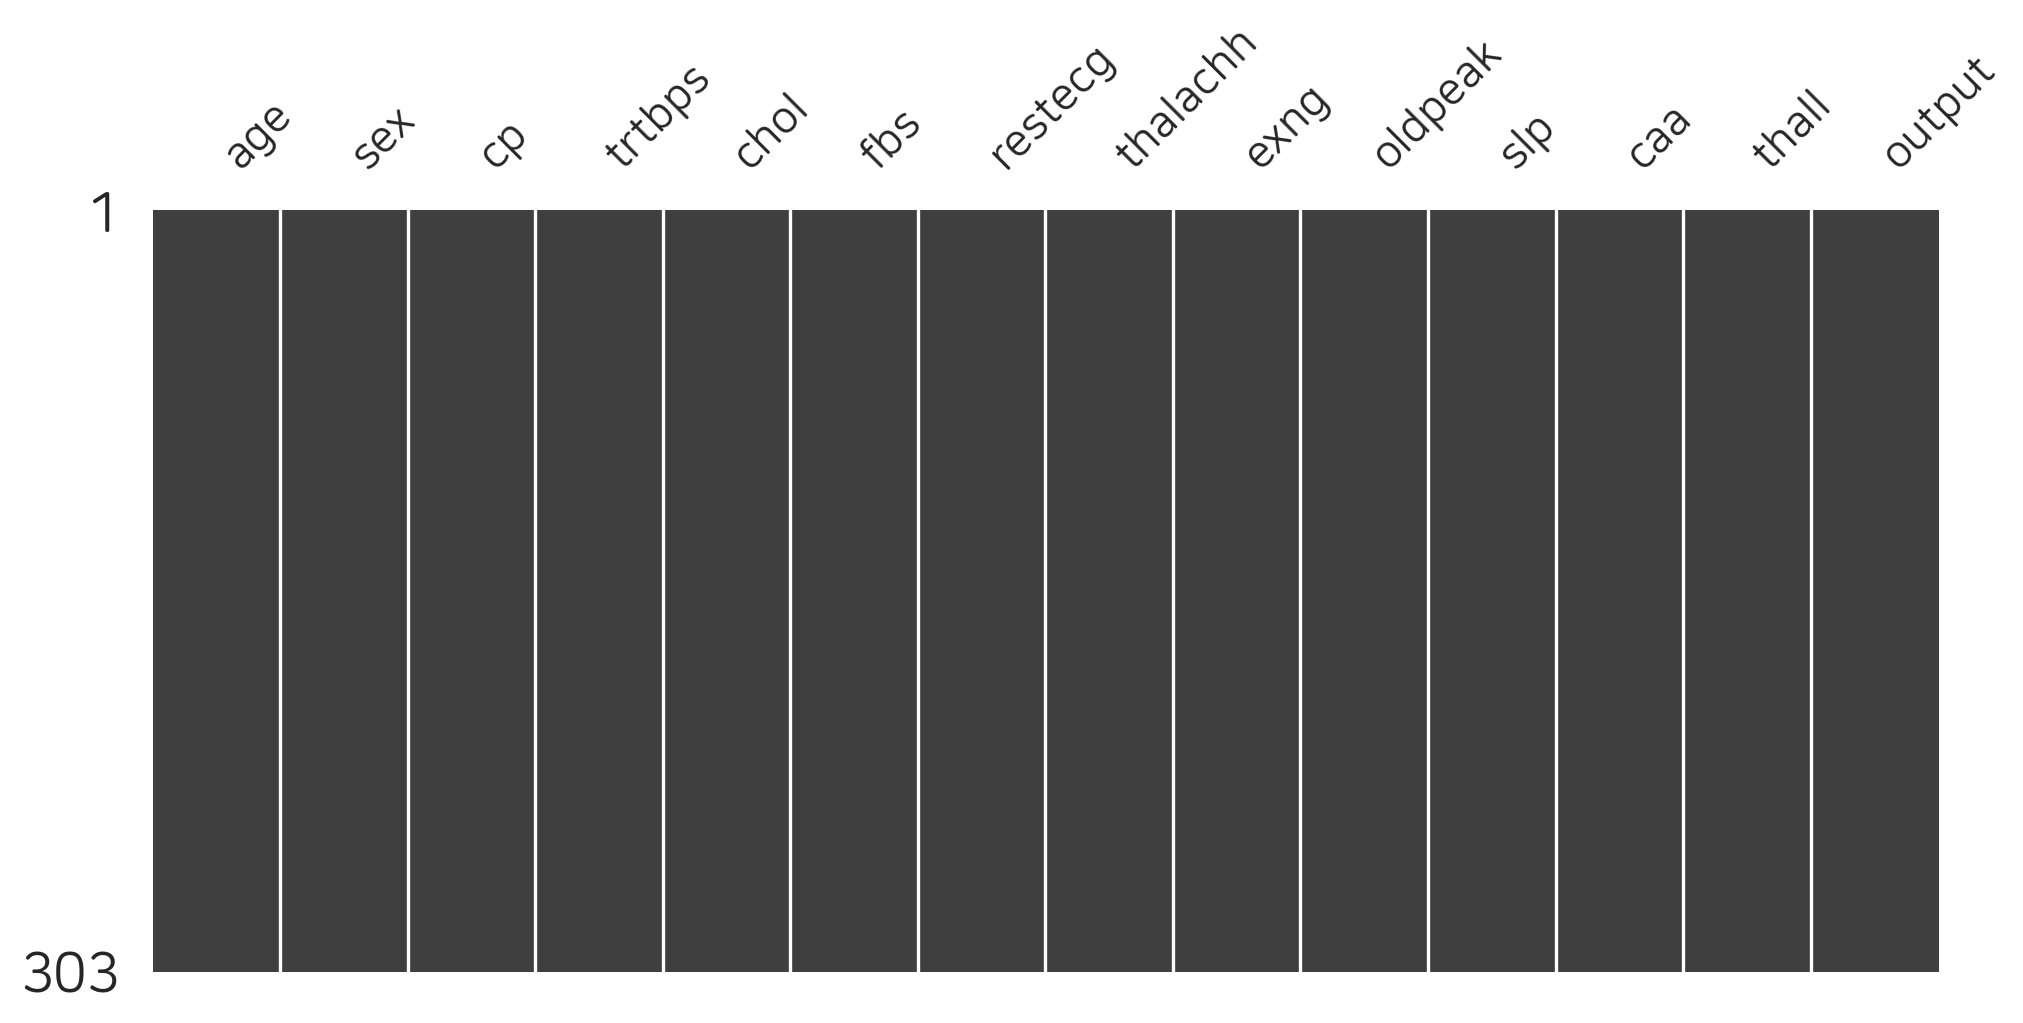

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

#결측치 노이즈 확인
fig, ax = plt.subplots(figsize=(10,5))
msno.matrix(data, sparkline=False, ax=ax);

### 데이터 스플릿

In [54]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="age")
y = data["age"]

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

### 상관 계수

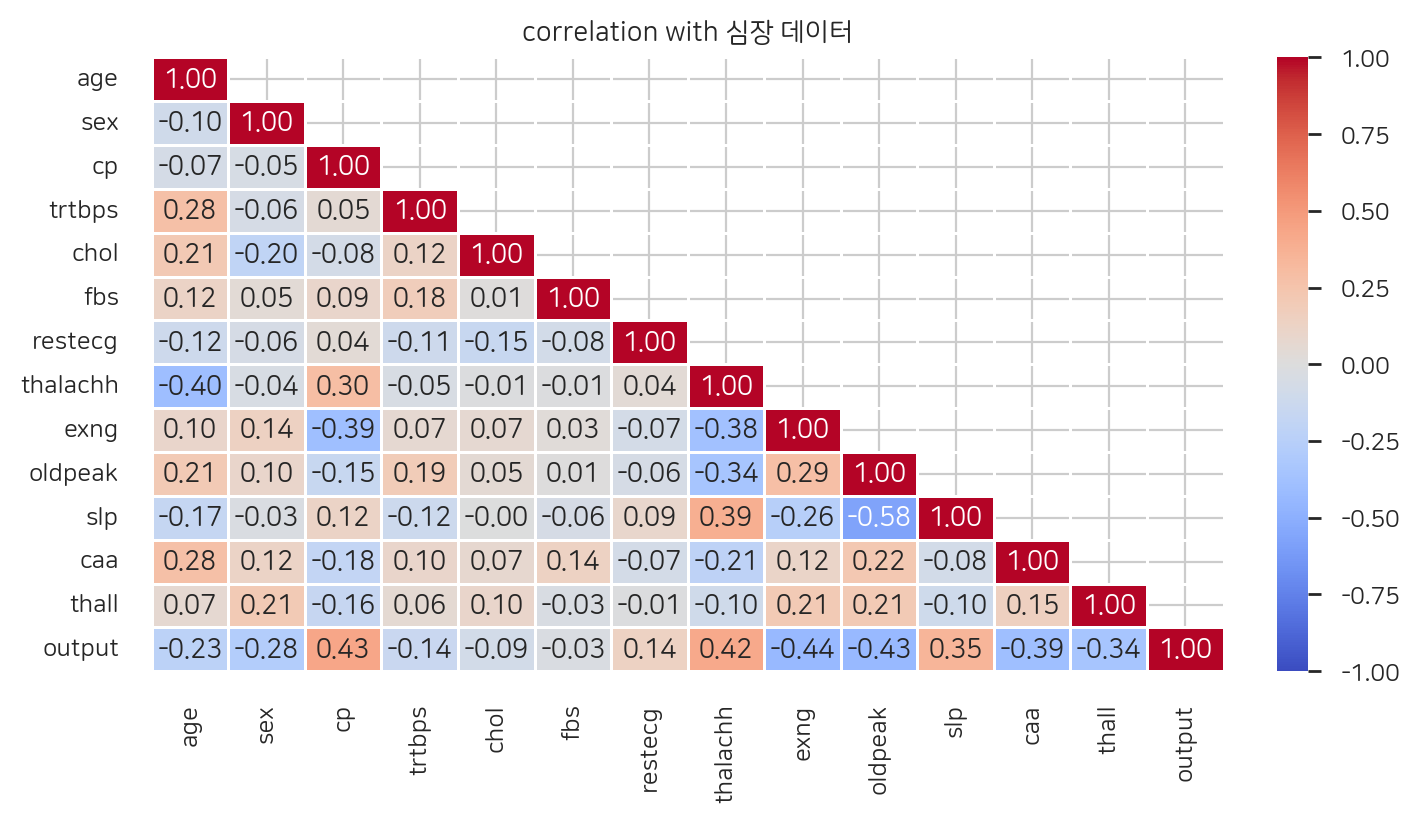

In [55]:
corr = data.corr(method = "pearson").to_numpy()
mask = np.triu(np.ones_like(corr), k=1)

fig, ax = plt.subplots(figsize=(7,4))

sns.heatmap(corr,
            xticklabels=data.keys(),
            yticklabels=data.keys(),
            annot = True,
            fmt = ".2f",
            cmap = "coolwarm", 
            vmin = -1, 
            vmax = 1,
            linewidths = 1,
            linecolor = "white",
            mask = mask)

ax.set_title("correlation with 심장 데이터");

### 데이터 스케일링

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

minmax_scaler = MinMaxScaler()
x_train = minmax_scaler.fit_transform(x_train) # 트레인 데이터로만 fit_transform
x_test = minmax_scaler.transform(x_test) # 테스트 데이터로만 transform

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

model_logi = LogisticRegression().fit(x_train, y_train)

### SVR

In [58]:
from sklearn.svm import SVR

model__SVR = SVR().fit(x_train, y_train) 

### K-NN Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor

model__knn = KNeighborsRegressor().fit(x_train, y_train) 

### Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

model__dtr = DecisionTreeRegressor().fit(x_train, y_train) 

### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

model__rfr = RandomForestRegressor().fit(x_train, y_train)

### XGBoost Regressor

In [62]:
from xgboost import XGBRegressor

model__xgb = XGBRegressor().fit(x_train, y_train)

### 오답 확인

In [63]:
from sklearn import metrics

In [64]:
def scores(model):
    mse = metrics.mean_squared_error(model.predict(x_test),y_test)
    mae = metrics.mean_absolute_error(model.predict(x_test),y_test)
    r2s = metrics.r2_score(model.predict(x_test),y_test)
    return mse, mae, r2s

print(f"{'Model Name':<20} {'MSE':<10} {'MAE':<10} {'R2':<10}")
print("-"*50)
for name, single_model in zip("logistic knn svr dtc rfc sgb".split(" "),
              [model_logi, model__knn, model__SVR, model__dtr, model__rfr, model__xgb]):
    mae_1, mae_2, r2 = scores(single_model)
    print(f"{name:<20} {mae_1:<10.2f} {mae_2:<10.2f} {r2:<10.2f}")

Model Name           MSE        MAE        R2        
--------------------------------------------------
logistic             70.64      6.75       -0.95     
knn                  76.51      6.82       -1.61     
svr                  65.37      6.47       -7.28     
dtc                  112.51     8.70       -0.27     
rfc                  60.49      6.24       -0.89     
sgb                  79.29      6.84       -0.40     
